## 1. 데이터 불러오기

In [255]:
import pandas as pd

df = pd.read_csv("./data/appreply2.csv",index_col=0)

df.head()

,text,score
0,"배달의민족 주문시 리뷰를 자주 참고하는 편입니다. 한가지 건의사항이 있다면 최신순,...",4
1,내가 주문했던 과거목록에서도 검색기능이 있었으면 좋겠어요.. 분명 이 가게에 시킨 ...,5
2,"검색 화면에서 전체/배달/포장 탭 중 배달 탭을 스크롤 내리면서 볼 때, 아래로 스...",1
3,배달팁 낮은 순으로 정렬하면 0~4000원 이런식으로 된 가게가 가장 위로 올라옵니...,2
4,최근 업데이트가 안드로이드5사양 정도에서는 안되는것 같습니다.. 배민 어플 실행시 ...,3


In [ ]:
# 장바구니 분석 과정
## 1. 지지도, 신뢰도, 향상도 지표 계산하기(aprior 알고리즘)
## 1) 데이터 준비 1
## [[문장 1 의 토그나이징 결과],[문장2의 토그나이징 결과
## 2) 데이터 준비 2
## 예시: [[오늘],[하루],[맑음]...]
## 데이터 프레임
##      오늘 하루 맑음
## 문장1 True False ..
## 문장2
## 문장3

## 2. 데이터 준비하기

In [256]:
import numpy as np
import re
from konlpy.tag import Okt

In [257]:
# 워드 클라우드 그릴때 [문장 1의 토크나이징 결과, 문장2의 토크나이징 결과]
# 단어 리스트 만들기
okt = Okt()


words_list = []
drop_list = []

df.head()

for line in df["text"]:

    #print(line[:40])
    clean_line = re.sub(r"[^1-9a-zA-Z가-핳\s]+","",line)
    #print(clean_line[:40])
    line_pos = okt.pos(clean_line)
    #print("-"*30)
    sub_list = []
    for word in line_pos:
        if word[0] in drop_list : continue
        if word[1]=="Noun" and len(word[0]) >1:
            sub_list.append(word[0])
    #print(sub_list)
    words_list.append(sub_list)   
#print(words_list)

In [258]:
print(words_list)

[['배달', '민족', '주문', '리뷰', '자주', '참고', '편입', '한가지', '건의', '사항', '최신', '점순', '주문', '자하', '메뉴', '특정', '메뉴', '리뷰', '기능', '메뉴', '검색', '기능', '리뷰', '특정', '메뉴', '검색', '기능', '주문', '수가', '메뉴', '리뷰', '보기', '위서', '래그', '시간', '소요', '비율', '발생', '긍정', '검토', '주심'], ['주문', '과거', '목록', '검색', '기능', '분명', '가게', '기억', '찾기', '메뉴', '검색', '가능', '곱창', '치면', '과거', '곱창', '목록', '가게', '리뷰', '리뷰', '보기'], ['검색', '전체', '배달', '포장', '배달', '크롤', '아래', '크롤', '자꾸만', '왼쪽', '오른쪽', '전체', '포장', '정말', '검색', '배달', '포장', '마트', '하나', '선택', '좌우', '가끔', '크롤', '왼쪽', '전체', '가게', '답답'], ['배달', '정렬', '가게', '가장', '위로', '지역', '추가', '배달', '별도', '체크', '배달', '이상', '배달', '장난', '하나', '하나', '가격', '대별', '금액', '체크', '배달', '별도'], ['최근', '업데이트', '안드로이드', '사양', '정도', '배민', '어플', '실시', '업데이트', '하라', '업데이트', '업데이트', '열기', '열기', '업데이트', '무한', '반복', '삭제', '설치', '설정', '보아', '증상', '다른', '증상', '이번', '업데이트', '관련', '파일', '필요', '참고', '사양', '드폰', '사양', '문제', '이번', '업데이트'], ['매장', '구분', '대체', '언제', '이면', '개선', '독점', '건가', '결제', '관련', '부분', '정말', '별로', '구성', '정

In [259]:
for x in words_list:
    print(x)
    print("-"*30)

['배달', '민족', '주문', '리뷰', '자주', '참고', '편입', '한가지', '건의', '사항', '최신', '점순', '주문', '자하', '메뉴', '특정', '메뉴', '리뷰', '기능', '메뉴', '검색', '기능', '리뷰', '특정', '메뉴', '검색', '기능', '주문', '수가', '메뉴', '리뷰', '보기', '위서', '래그', '시간', '소요', '비율', '발생', '긍정', '검토', '주심']
------------------------------
['주문', '과거', '목록', '검색', '기능', '분명', '가게', '기억', '찾기', '메뉴', '검색', '가능', '곱창', '치면', '과거', '곱창', '목록', '가게', '리뷰', '리뷰', '보기']
------------------------------
['검색', '전체', '배달', '포장', '배달', '크롤', '아래', '크롤', '자꾸만', '왼쪽', '오른쪽', '전체', '포장', '정말', '검색', '배달', '포장', '마트', '하나', '선택', '좌우', '가끔', '크롤', '왼쪽', '전체', '가게', '답답']
------------------------------
['배달', '정렬', '가게', '가장', '위로', '지역', '추가', '배달', '별도', '체크', '배달', '이상', '배달', '장난', '하나', '하나', '가격', '대별', '금액', '체크', '배달', '별도']
------------------------------
['최근', '업데이트', '안드로이드', '사양', '정도', '배민', '어플', '실시', '업데이트', '하라', '업데이트', '업데이트', '열기', '열기', '업데이트', '무한', '반복', '삭제', '설치', '설정', '보아', '증상', '다른', '증상', '이번', '업데이트', '관련', '파일', '필요', '참고', '사양', '

## 3. 데이터 준비하기 2

In [ ]:
# uv add mlxtend

In [260]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,association_rules

te = TransactionEncoder()
te_arr = te.fit(words_list).transform(words_list)
te_arr

array([[False, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       ...,
       [ True, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]],
      shape=(1000, 2762))

In [261]:
df = pd.DataFrame(te_arr,columns=te.columns_)
df

,가게,가격,가계,가공,가관,가구,가기,가까스로,가까윤,가까이,...,할증,할하,함박,함정,합리,핫밀,항만,항목,항상,항의
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
996,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
997,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [262]:
# 각 단어별로 출현한 횟수
df.sum()

가게    208
가격     29
가계      1
가공      1
가관      2
     ... 
핫밀      1
항만      1
항목      7
항상     33
항의      1
Length: 2762, dtype: int64

# 4.장바구니 분석

In [263]:
# support는 전체 문장중에 itemset이 등장한 문장의 비율
#min_support : support가 min_support 이상인것만 보여주세요
#mzx_len:max_let 의 조합까지 보여주세요

frequent_itemsets = apriori(df,min_support=0.05,use_colnames=True,max_len=2)
frequent_itemsets

,support,itemsets
0,0.208,frozenset({가게})
1,0.101,frozenset({개선})
2,0.111,frozenset({검색})
3,0.115,frozenset({결제})
4,0.076,frozenset({경우})
...,...,...
79,0.076,"frozenset({사용, 주문})"
80,0.052,"frozenset({시간, 주문})"
81,0.050,"frozenset({주문, 어플})"
82,0.057,"frozenset({주문, 음식})"


In [264]:
# metric이 min_threshold 이상인것만 보여주세요
rules = association_rules(frequent_itemsets,metric="lift",min_threshold=0.1)
df_rul = rules[["antecedents","consequents","support","confidence","lift"]]


In [214]:
print(df_rul)

        antecedents      consequents  support  confidence      lift
0   frozenset({기능})  frozenset({가게})    0.061    0.369697  1.777389
1   frozenset({가게})  frozenset({기능})    0.061    0.293269  1.777389
2   frozenset({리뷰})  frozenset({가게})    0.054    0.278351  1.338224
3   frozenset({가게})  frozenset({리뷰})    0.054    0.259615  1.338224
4   frozenset({가게})  frozenset({메뉴})    0.063    0.302885  1.692093
..              ...              ...      ...         ...       ...
65  frozenset({어플})  frozenset({주문})    0.050    0.333333  1.075269
66  frozenset({주문})  frozenset({음식})    0.057    0.183871  1.351992
67  frozenset({음식})  frozenset({주문})    0.057    0.419118  1.351992
68  frozenset({주문})  frozenset({취소})    0.052    0.167742  2.362562
69  frozenset({취소})  frozenset({주문})    0.052    0.732394  2.362562

[70 rows x 5 columns]


In [265]:
#print(df_rul)
#df_store =df_rul[df_rul["antecedents"].apply(lambda x: '가게' in x).apply(lambda x : '개선' in x)]
df_store =df_rul[df_rul["antecedents"].apply(lambda x: '가게' in x)]
df_store


,antecedents,consequents,support,confidence,lift
1,frozenset({가게}),frozenset({기능}),0.061,0.293269,1.777389
3,frozenset({가게}),frozenset({리뷰}),0.054,0.259615,1.338224
4,frozenset({가게}),frozenset({메뉴}),0.063,0.302885,1.692093
7,frozenset({가게}),frozenset({배달}),0.109,0.524038,1.196435
8,frozenset({가게}),frozenset({배민}),0.051,0.245192,1.114510
11,frozenset({가게}),frozenset({주문}),0.086,0.413462,1.333747


In [ ]:
# 지지도 : support(A-B) = support(B-A) = P(AnB) = 전체 문장 중 A,B가 동시에 들어간 문장의 비율
# 신뢰도 : confidence(A-B) = P(B|A),confidence(B-A) = P(A|B) 
# 향상도 : lift(A-B) = confidence(A-B) /  P(A),lift(B-A) = confidence(B-A) / P(B)

In [ ]:
## 표현 : antecedents - consequents
## 예시 1 : 가게 - 개선
## support : 전체 문장에서 가게, 개선이 모두 등장한 문장의 비율
## -> 1000문장 중에 29문장은 가게, 개선이 같이 등장했다
## confidence : 개선이 등장한 문장 중에서 개선,가게가 동시에 등장한 문장의 비율
## ->가게 문장이 예를 들어 100이라면 100개중 14개 정도는 가게가 들어가 있다
## lift : 가게가 혼자 등장했을 떄 보다 가게 문장에서 개선이 들어가 있을 때 비교
## -> 가게가 혼자 등장할 때보다 가게 문장들에서 개선이 들어가 있는게 확률이1.36배높더라.

## 예시2 : 개선-가게
## support  : 전체 문장에서 가게 ,개선 이 모두 등장한 문장의 비율
## -> 1000문장 중에 19문장은 "가게","개선"이 같이 등장했다
## confidence : "개선"이 등장한 문장 중에서 "개선","가게"가 동시에ㅐ 등장한 문장이 비율
## -> "개선" 문장이 예를 들어 100이라면 100개중 28개정도는 "가게"가 들어가 있더라
## lift : "가게"가 등장했을 때와 "개선" 문장에서  "가게"이 들어가 있을때를 비교
## -> "가게"가 등장할 확률보다 "개선"문장들에서 "가게"가 들어가 있는 확률이 1.36배 높더라

# 5. 시각화 (히트맵)

In [266]:
# pibot_table

pivot_data = rules.head(20).pivot_table(
    index = "antecedents", # 행
    columns="consequents", # 열
    values="lift",         # 매칭되지 않ㅇ는것은 이것으로 채워라
    fill_value=0
)
pivot_data

consequents,frozenset({가게}),frozenset({기능}),frozenset({리뷰}),frozenset({메뉴}),frozenset({배달}),frozenset({배민}),frozenset({주문}),frozenset({결제}),frozenset({센터}),frozenset({고객})
antecedents,,,,,,,,,,
frozenset({기능}),1.777389,0.000000,1.749453,1.929914,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
frozenset({가게}),0.000000,1.777389,1.338224,1.692093,1.196435,1.11451,1.333747,0.000000,0.000000,0.000000
frozenset({리뷰}),1.338224,1.749453,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
frozenset({메뉴}),1.692093,1.929914,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
frozenset({배달}),1.196435,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
frozenset({배민}),1.114510,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
frozenset({주문}),1.333747,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.458626,0.000000,0.000000
frozenset({결제}),0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.458626,0.000000,0.000000,0.000000
frozenset({고객}),0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,10.656436,0.000000


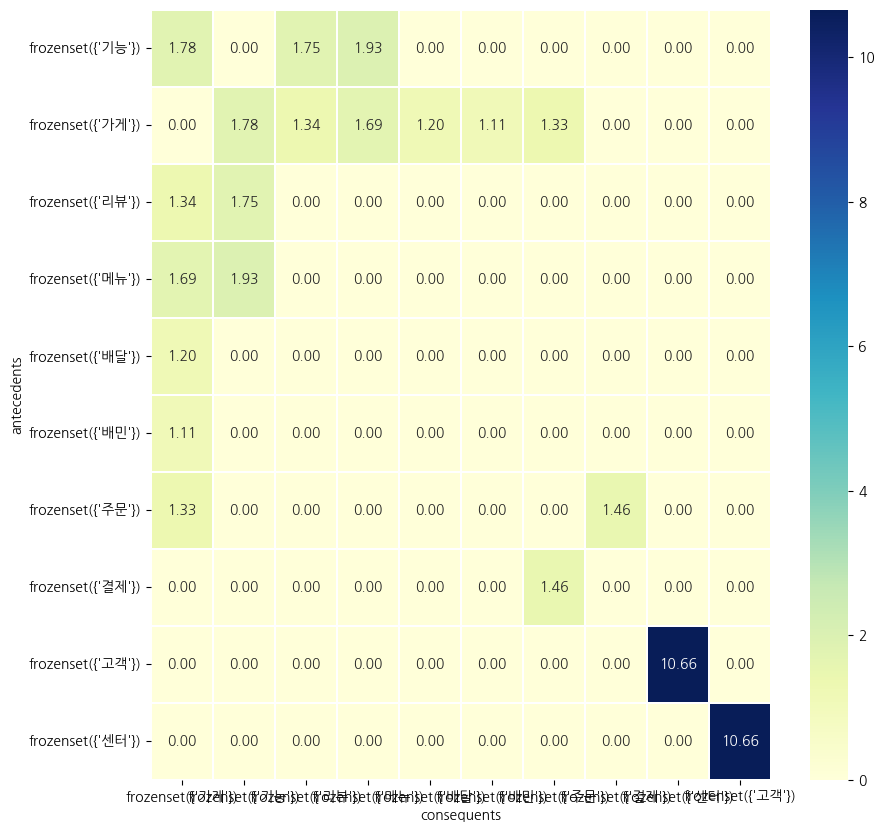

In [267]:
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

plt.figure(figsize=(10,10))
sns.heatmap(pivot_data,annot=True,cmap="YlGnBu",fmt=".2f",linewidths=0.3)
plt.xticks(rotation=0)
plt.show()

# 6. 시각화(네트워크 분석)

In [ ]:
# uv add networkx

In [ ]:
# iterrows 이해하기
# 데이터 프레임에서 하나의 행씩 추철(인덱스,열 데이터)
sample_data = rules[["antecedents","consequents"]].head(1)
for x in sample_data.iterrows():
    print(len(x))
    print(x[0],x[1])
    print("-"*50)
    print(x[1])
    print("-"*50)

2
0 antecedents    frozenset({기능})
consequents    frozenset({가게})
Name: 0, dtype: object
--------------------------------------------------
antecedents    frozenset({기능})
consequents    frozenset({가게})
Name: 0, dtype: object
--------------------------------------------------


In [253]:
sample_data = rules[["antecedents","consequents"]].head(1)

for x,y in sample_data.items():
    print(x)
    print(f"antecedents:{y[0]}")
    print("-"*50)

antecedents
antecedents:frozenset({'기능'})
--------------------------------------------------
consequents
antecedents:frozenset({'가게'})
--------------------------------------------------


In [93]:
# .join() 이해하기
test = ["오늘","하루","맑음"]
print("/".join(test)) # ,를 다른 문자들오 바꿔 보세요.

오늘/하루/맑음


In [268]:
import networkx as nx
import matplotlib.pyplot as plt

# 1. 그래프 생성
G = nx.Graph()

In [1]:
my_rul = rules.sort_values(by=["confidence"],ascending=False)

NameError: name 'rules' is not defined

In [269]:

# 2. 엣지 추가 for _ ,data in rules.iterrows():  첫번째 인덱스는 사용하지 않겠다는 의미
my_rul = rules.sort_values(by=["confidence"],ascending=False)
for _ ,col_data in my_rul.head(50).iterrows():
    # 1) 단어 추출
    print(f"[BEFORE] {col_data['antecedents']},{col_data['consequents']}")
    antecedent = ",".join(col_data["antecedents"])
    conseequent = ",".join(col_data["consequents"])
    print(f"[AFTER] {antecedent},{conseequent}")
    print("-"*50)

    # 2)지표 추출
    weight = col_data["support"]

    # 3) 그래프에 노드 추가
    G.add_edge(antecedent,conseequent,weight=weight)


[BEFORE] frozenset({'민족'}),frozenset({'배달'})
[AFTER] 민족,배달
--------------------------------------------------
[BEFORE] frozenset({'센터'}),frozenset({'고객'})
[AFTER] 센터,고객
--------------------------------------------------
[BEFORE] frozenset({'취소'}),frozenset({'주문'})
[AFTER] 취소,주문
--------------------------------------------------
[BEFORE] frozenset({'음식'}),frozenset({'배달'})
[AFTER] 음식,배달
--------------------------------------------------
[BEFORE] frozenset({'시간'}),frozenset({'배달'})
[AFTER] 시간,배달
--------------------------------------------------
[BEFORE] frozenset({'고객'}),frozenset({'센터'})
[AFTER] 고객,센터
--------------------------------------------------
[BEFORE] frozenset({'다른'}),frozenset({'배달'})
[AFTER] 다른,배달
--------------------------------------------------
[BEFORE] frozenset({'어플'}),frozenset({'배달'})
[AFTER] 어플,배달
--------------------------------------------------
[BEFORE] frozenset({'가게'}),frozenset({'배달'})
[AFTER] 가게,배달
--------------------------------------------------
[BEFORE] f

In [270]:
G.edges()

EdgeView([('민족', '배달'), ('배달', '음식'), ('배달', '시간'), ('배달', '다른'), ('배달', '어플'), ('배달', '가게'), ('배달', '쿠폰'), ('배달', '주문'), ('배달', '배민'), ('배달', '사용'), ('배달', '기능'), ('배달', '리뷰'), ('배달', '메뉴'), ('센터', '고객'), ('취소', '주문'), ('주문', '시간'), ('주문', '결제'), ('주문', '음식'), ('주문', '가게'), ('주문', '기능'), ('주문', '사용'), ('주문', '리뷰'), ('주문', '메뉴'), ('주문', '배민'), ('주문', '어플'), ('어플', '사용'), ('가게', '기능'), ('가게', '메뉴'), ('가게', '리뷰'), ('가게', '배민'), ('배민', '사용'), ('배민', '리뷰'), ('메뉴', '리뷰'), ('메뉴', '기능'), ('리뷰', '기능')])

In [209]:
G["기능"]["가게"]

{'weight': 0.061}

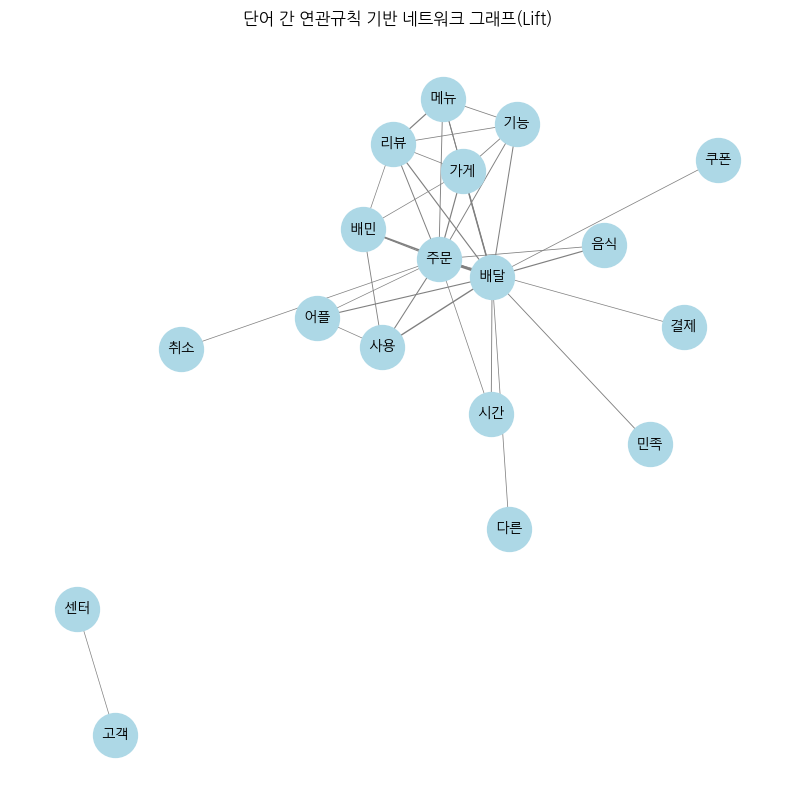

In [271]:
# 3. 노드 배치
#position = nx.kamada_kawai_layout(G)
position = nx.spring_layout(G,seed=15)

# 4. 가중치 추출
scale = 10 ## 선의 굵기가 너무 굴ㄷ다면 사이즈 줄이기

edge_weights = [G[u][v]["weight"]*scale for u,v in G.edges()]

# 5. 그리기
plt.figure(figsize=(10,10))
nx.draw_networkx_nodes(G,position,node_color="lightblue",node_size=1000)
nx.draw_networkx_edges(G,position,edge_color="gray",width=edge_weights) # 선,선의 굵기
nx.draw_networkx_labels(G,position,font_size=10,font_family="Malgun Gothic")
plt.title("단어 간 연관규칙 기반 네트워크 그래프(Lift)")
plt.axis("off")
plt.show()